<a href="https://www.kaggle.com/code/yorkyong/abalone-regression-baseline?scriptVersionId=169724575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


![](https://www.researchgate.net/profile/Han-Lim-4/publication/264182090/figure/fig2/AS:329358293127169@1455536544346/Measurements-of-the-abalone-body-portions.png)


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>


### <b><span style='color:#FFCE30'> 1.1 |</span> Objective</b>

- The goal of this competition is to predict the age of abalone from various physical measurements.

### <b><span style='color:#FFCE30'> 1.2 |</span> Background</b>

- The prediction of abalone age, crucial for both economic and environmental reasons, poses a challenging task due to the intricate process of determining the age of these marine shells. 
- Traditionally, abalone age is deduced by counting the rings within their shells, akin to tree rings, yet this manual method is prone to inaccuracies. 
- To mitigate this, researchers have explored leveraging physical attributes like sex, weight, height, and length to predict abalone age. 
- While past efforts primarily approached this as a classification problem, this competition shifts focus to regression models to enhance predictive accuracy. 
- With an emphasis on Root Mean Squared Logarithmic Error (RMSLE) as the evaluation metric, participants are tasked with devising regression models capable of estimating the number of rings—an indicator of abalone age—with precision. 

### <b><span style='color:#FFCE30'> 1.3 |</span> References</b>
1. https://harshithaindumathi.medium.com/abalone-age-prediction-607ecda3fa3b

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD DATA & LIBRARIES</b></div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import CatBoostEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import  StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

#xgboost library
import xgboost as xgb
from xgboost import XGBRegressor

#lgb library
import lightgbm as lgb
from lightgbm import LGBMRegressor

#catboost library
from catboost import CatBoostRegressor

In [2]:
#Load the data
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e4/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e4/sample_submission.csv')

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [5]:
sample_submission.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>DATA EXPLORATION AND ANALYSIS</b></div>
- In this section, I load the dataset and perform exploratory data analysis to gain insights into the data.
- Analyze the distribution of each attribute, including the target variable Rings.
- Visualize the relationships between different features and the target variable.
- Identify any outliers or missing values that need to be addressed during preprocessing.


In [6]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,90615.00,45307.00,26158.44,0.00,22653.50,45307.00,67960.50,90614.00
Length,90615.00,0.52,0.12,0.07,0.45,0.55,0.60,0.81
Diameter,90615.00,0.40,0.10,0.06,0.34,0.42,0.47,0.65
Height,90615.00,0.14,0.04,0.00,0.11,0.14,0.16,1.13
Whole weight,90615.00,0.79,0.46,0.00,0.42,0.80,1.07,2.83
Whole weight.1,90615.00,0.34,0.20,0.00,0.18,0.33,0.46,1.49
Whole weight.2,90615.00,0.17,0.10,0.00,0.09,0.17,0.23,0.76
Shell weight,90615.00,0.23,0.13,0.00,0.12,0.23,0.30,1.00
Rings,90615.00,9.70,3.18,1.00,8.00,9.00,11.00,29.00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [8]:
train.describe(include='O').T

,count,unique,top,freq
Sex,90615,3,I,33093


In [9]:
cols = train.columns
cols

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

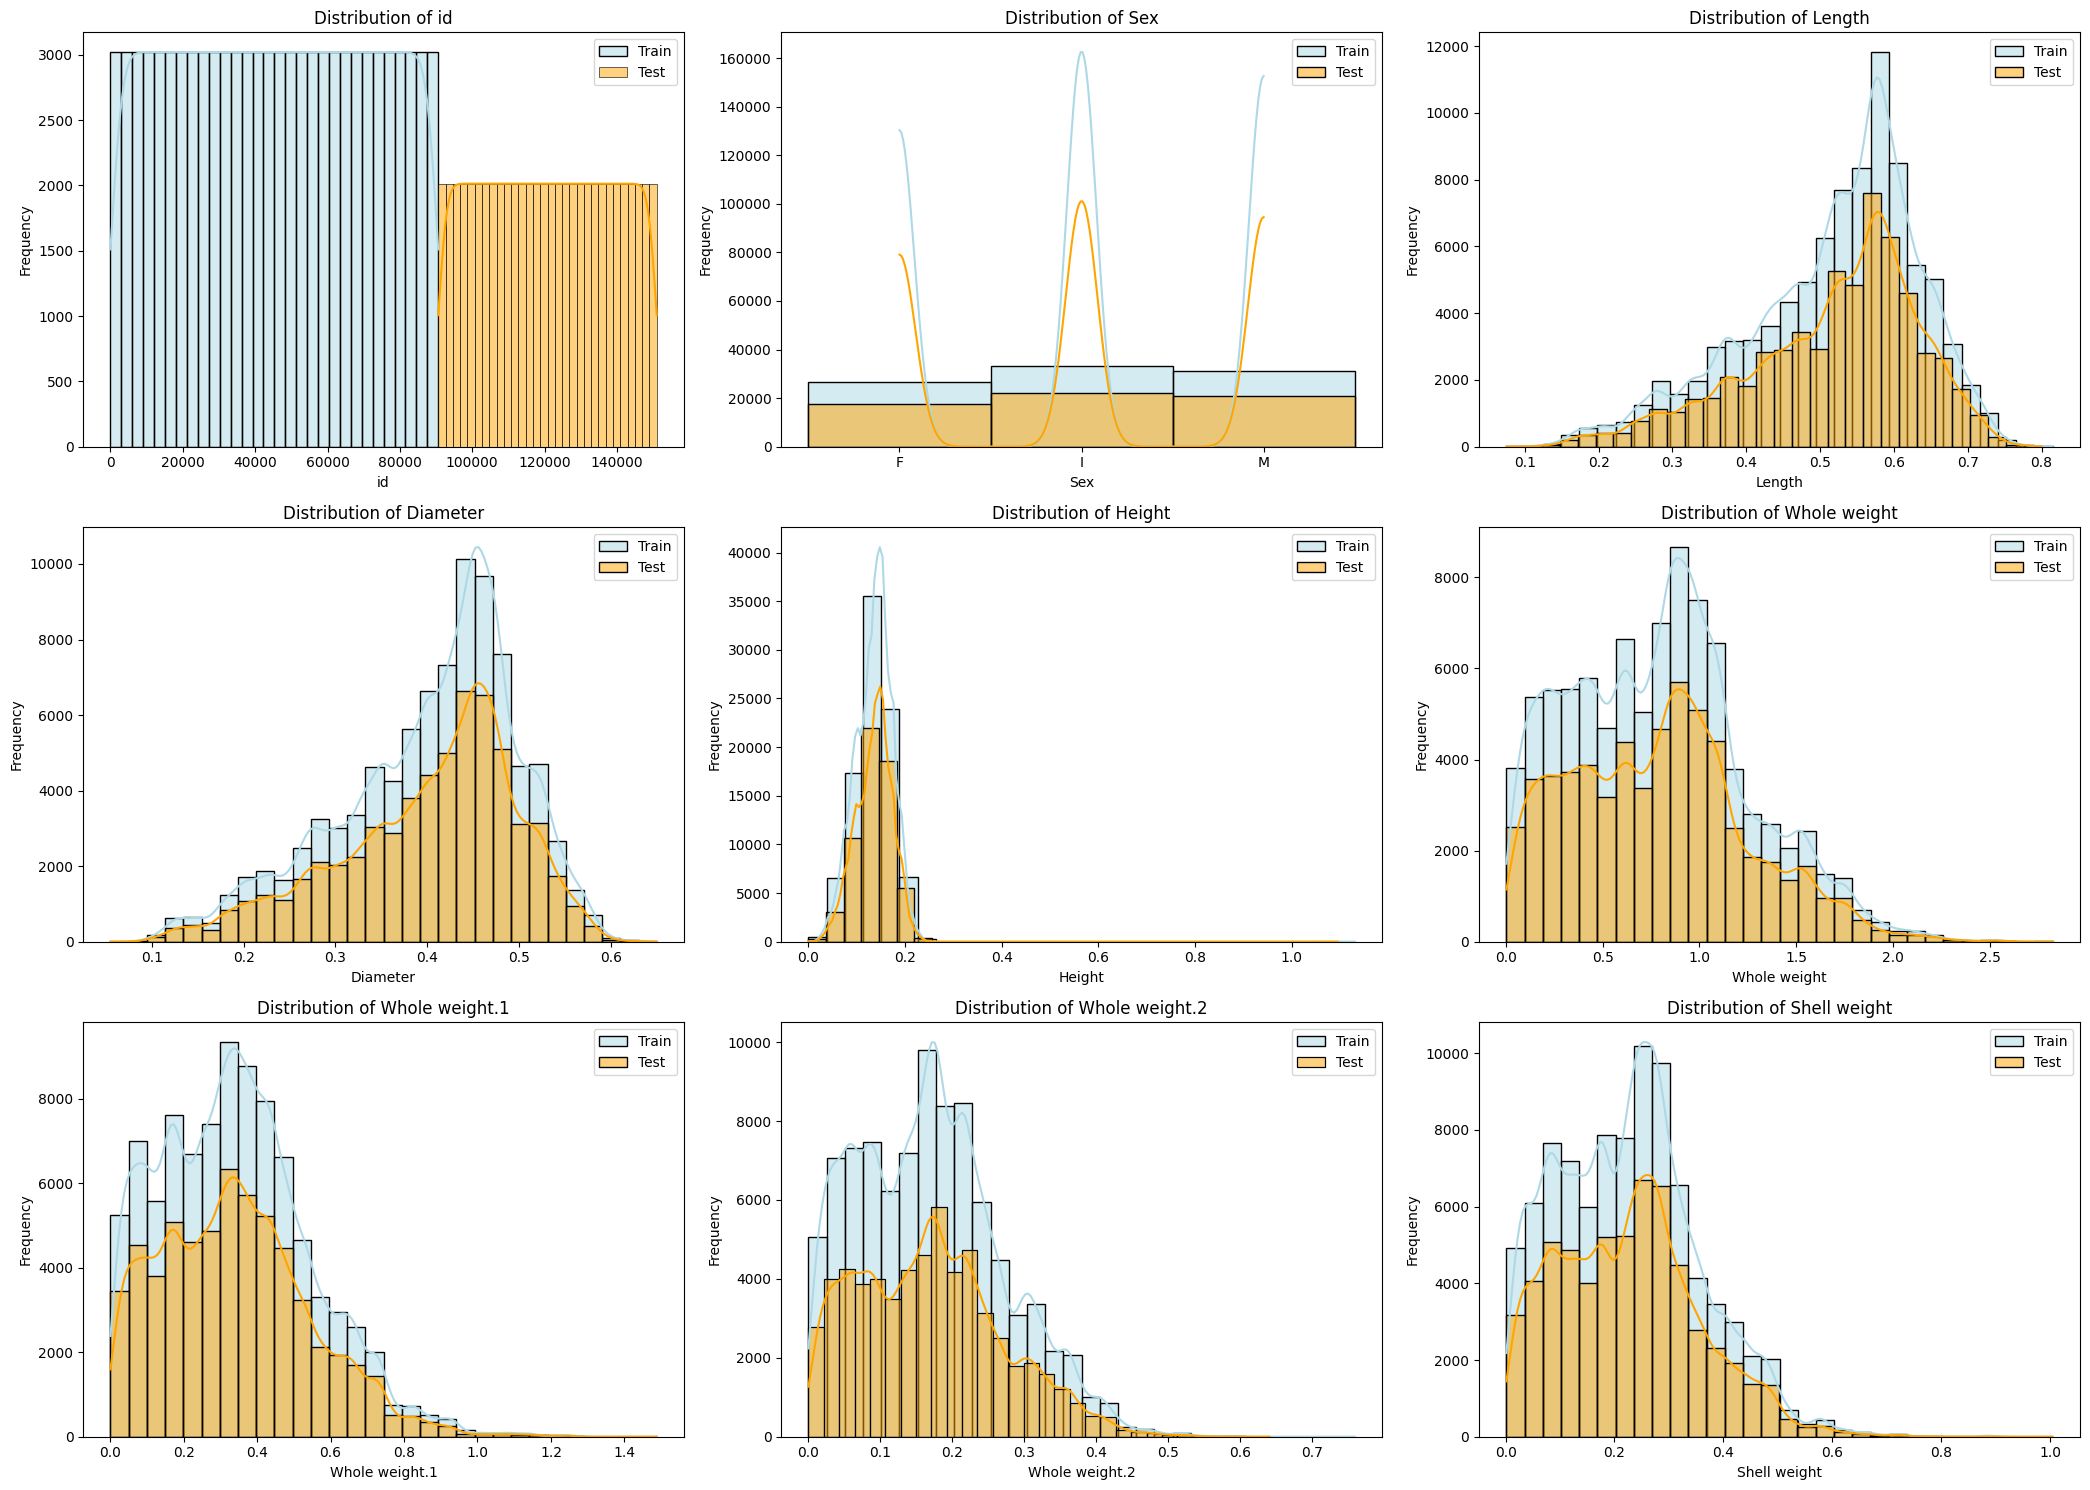

In [10]:
cols = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight']

colors = ['lightblue', 'orange']  

num_plots = len(cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(train[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

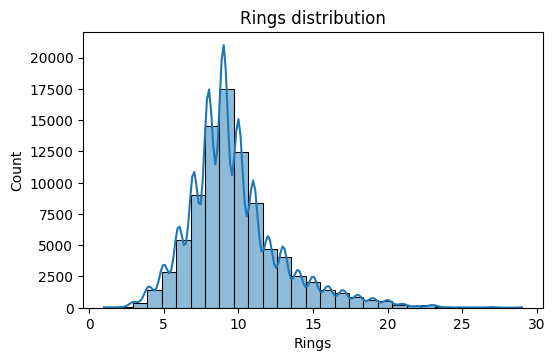

In [11]:
target_cols = ['Rings']
plt.figure(figsize=(20,30))

for i, column in enumerate(target_cols):
    plt.subplot(9,4, i+1)
    sns.histplot(data=train, x=column, kde=True, bins=29)
    plt.title(f'{column} distribution')
    plt.tight_layout()

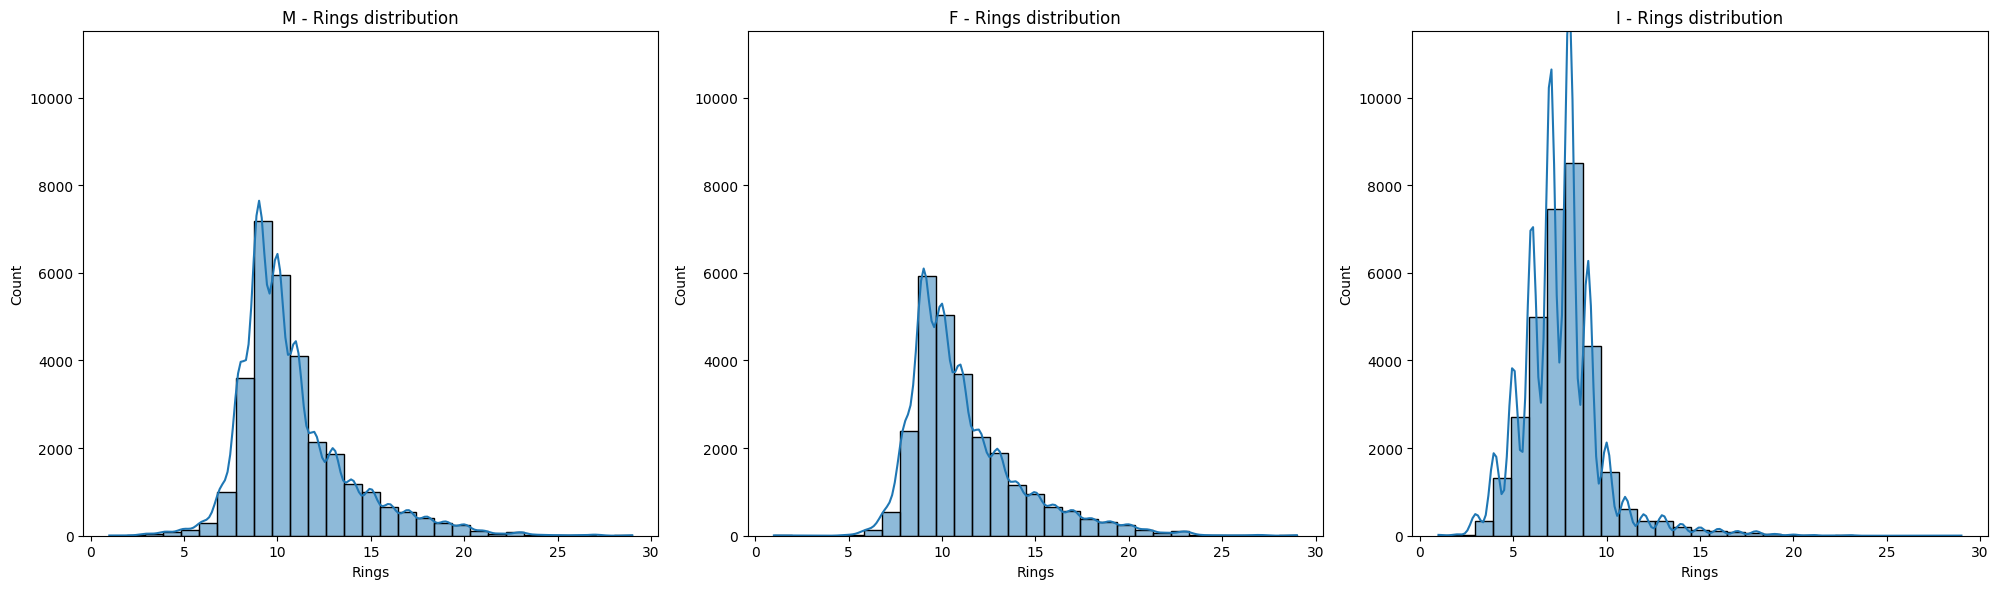

In [12]:
target_col = 'Rings'
sex_categories = ['M', 'F', 'I']
plt.figure(figsize=(20, 6))  # Adjust the figure size as needed
max_count = 0  # Initialize max_count variable

for i, sex in enumerate(sex_categories):
    plt.subplot(1, 3, i+1)  # 1 row, 3 columns, i+1th plot
    subset_data = train[train['Sex'] == sex]
    sns.histplot(data=subset_data, x=target_col, kde=True, bins=29)
    plt.title(f'{sex} - {target_col} distribution')
    current_max_count = subset_data[target_col].value_counts().max()  # Get max count for current sex category
    if current_max_count > max_count:  # Update max_count if needed
        max_count = current_max_count
    plt.tight_layout()

# Set the same y-axis scale for all plots
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.ylim(0, max_count + 3000)
    
plt.show()


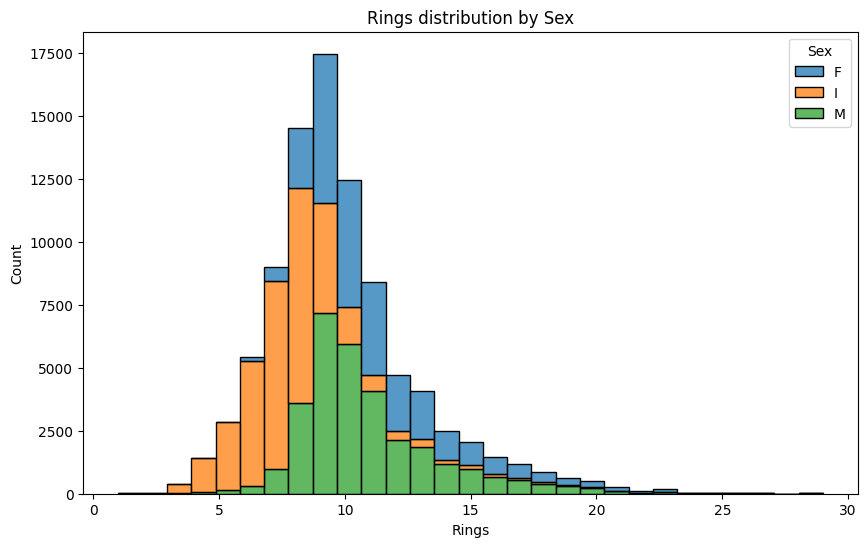

In [13]:
target_col = 'Rings'
sex_categories = ['M', 'F', 'I']

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot histogram for each sex category
sns.histplot(data=train, x=target_col, hue='Sex', bins=29, multiple='stack')
plt.title(f'Rings distribution by Sex')
plt.xlabel(target_col)
plt.ylabel('Count')

plt.show()


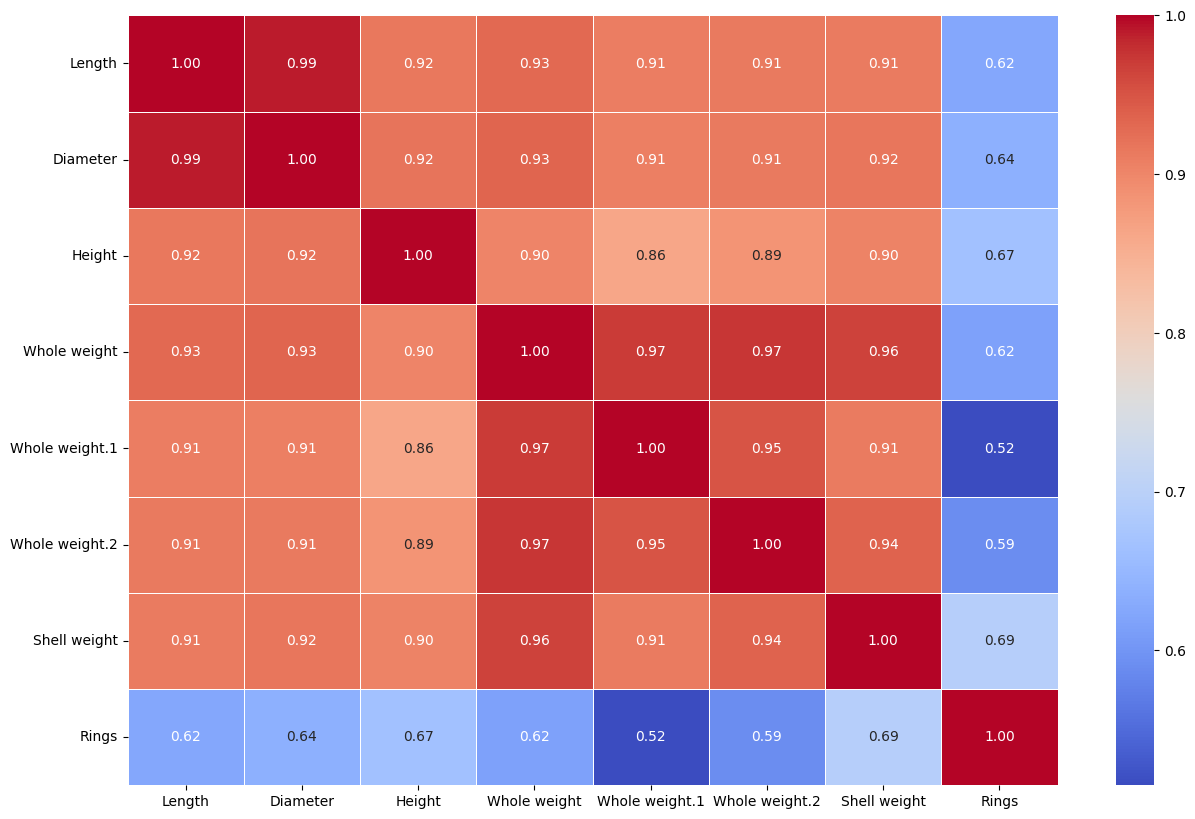

In [14]:
cols = ['Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

df_corr = train[cols].dropna().corr()
plt.figure(figsize=(15, 10))

# Plot the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

### <b><span style='color:#FFCE30'> 3.1 |</span> Insights</b>
- There are 3 types of gender for Abalone (in a sense): M for male, F for female, and I for infant.
- As with usual kaggle playground data, the train and test distribution is very similar (Visually)
- Data Dictionary from original data as follows:

> - Sex => M, F, and I (infant)
> - Length => Longest shell measurement
> - Diameter => perpendicular to length
> - Height => with meat in shell
> - Whole_weight => whole abalone
> - (Whole Weight 1) Shucked_weight => weight of meat
> - (Whole Weight 2) Viscera_weight => gut weight (after bleeding)
> - Shell_weight => after being dried
> - Rings +1.5 gives the age in years

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>DATA PREPROCESSING</b></div>
- Handle missing values: Impute missing values or consider dropping rows/columns with a high proportion of missing data.
- Encode categorical variables: Convert categorical variables like Sex into numerical format using techniques like one-hot encoding or label encoding.
- Feature scaling: Normalize or standardize numerical features to ensure they are on the same scale.
- Feature engineering: Create new features or transform existing ones based on domain knowledge or insights from EDA. Some ideas includes:
> 1. Shell volume: Calculate the volume of the shell using the length, diameter, and height features. This could potentially capture the overall size of the abalone, which might correlate with age.
> 2. Meat to shell ratio: Compute the ratio of the shucked weight (meat weight) to the shell weight. This could indicate how much meat the abalone has relative to its shell size, which might be related to age.
> 3. Shell surface area: Calculate the surface area of the shell based on its dimensions. A larger surface area could suggest a larger and potentially older abalone.
> 4. Sexual maturity: Encode the sex feature into binary variables (e.g., is_male, is_female) and investigate if there's a difference in age distribution between male and female abalones.
> 5. Proportional weights: Explore the relationship between different weight measurements (whole weight, shucked weight, viscera weight) and age. You could calculate ratios or proportions between these weights to capture different aspects of abalone physiology.
> 6. Dimension ratios: Investigate the ratios between length, diameter, and height to see if certain proportions are indicative of age.

### <b><span style='color:#FFCE30'> 4.1 |</span> Drop Columns</b>

In [15]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

DropColumn(cols=['id']).fit_transform(train)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


### <b><span style='color:#FFCE30'> 4.2 |</span> Add Features</b>

In [16]:
class AddAdditionalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, max_ratio=100):
        self.max_ratio = max_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        # Shell volume
        X_transformed['Shell_Volume'] = X['Length'] * X['Diameter'] * X['Height']
        
        # Meat to shell ratio
        X_transformed['Meat_to_Shell_Ratio'] = X['Whole weight.1'] / X['Shell weight']
        
        # Shell surface area
        X_transformed['Shell_Surface_Area'] = 2 * ((X['Length'] * X['Diameter']) + (X['Length'] * X['Height']) + (X['Diameter'] * X['Height']))
        
        # Proportional weights
        X_transformed['Whole_to_Shell_Ratio'] = X['Whole weight'] / X['Shell weight']
        X_transformed['Shucked_to_Whole_Ratio'] = X['Whole weight.1'] / X['Whole weight']
        X_transformed['Viscera_to_Whole_Ratio'] = X['Whole weight.2'] / X['Whole weight']
        
        # Dimension ratios
        X_transformed['Length_to_Diameter_Ratio'] = X['Length'] / X['Diameter']
        X_transformed['Length_to_Height_Ratio'] = X['Length'] / X['Height']
        X_transformed['Length_to_Height_Ratio'] = X_transformed['Length_to_Height_Ratio'].apply(lambda x: min(x, self.max_ratio))
        
        X_transformed['Diameter_to_Height_Ratio'] = X['Diameter'] / X['Height']
        X_transformed['Diameter_to_Height_Ratio'] = X_transformed['Diameter_to_Height_Ratio'].apply(lambda x: min(x, self.max_ratio))
        
        return X_transformed

# Usage
AAF = AddAdditionalFeatures(max_ratio=100).fit_transform(train)

In [17]:
AAF.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,90615.00,45307.00,26158.44,0.00,22653.50,45307.00,67960.50,90614.00
Length,90615.00,0.52,0.12,0.07,0.45,0.55,0.60,0.81
Diameter,90615.00,0.40,0.10,0.06,0.34,0.42,0.47,0.65
Height,90615.00,0.14,0.04,0.00,0.11,0.14,0.16,1.13
Whole weight,90615.00,0.79,0.46,0.00,0.42,0.80,1.07,2.83
Whole weight.1,90615.00,0.34,0.20,0.00,0.18,0.33,0.46,1.49
Whole weight.2,90615.00,0.17,0.10,0.00,0.09,0.17,0.23,0.76
Shell weight,90615.00,0.23,0.13,0.00,0.12,0.23,0.30,1.00
Rings,90615.00,9.70,3.18,1.00,8.00,9.00,11.00,29.00
Shell_Volume,90615.00,0.03,0.02,0.00,0.02,0.03,0.04,0.30


### <b><span style='color:#FFCE30'> 4.3 |</span> Assembling the Pipeline</b>

In [18]:
named_preprocessing_pipeline = Pipeline([
        ('Addfeature', AddAdditionalFeatures()),
                   
        ('drop', DropColumn(cols=[
            'id', #id is not a useful feature
        ]
                           )
        ),
    
        ('prep', ColumnTransformer([
            ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), list(['Sex'])),
        ],
         remainder='passthrough').set_output(transform='pandas')
        ),
])

named_preprocessing_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex'])]))])

### <b><span style='color:#FFCE30'> 4.4 |</span> Apply Scaling</b>

In [19]:
# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)


class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [20]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Sex'])])),
                ('scale', RobustScaler())])

In [21]:
X = train.drop('Rings', axis=1)
y = train['Rings']

In [22]:
#checking output on train df
df_train = modelling_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   encode__Sex                          90615 non-null  float64
 1   remainder__Length                    90615 non-null  float64
 2   remainder__Diameter                  90615 non-null  float64
 3   remainder__Height                    90615 non-null  float64
 4   remainder__Whole weight              90615 non-null  float64
 5   remainder__Whole weight.1            90615 non-null  float64
 6   remainder__Whole weight.2            90615 non-null  float64
 7   remainder__Shell weight              90615 non-null  float64
 8   remainder__Shell_Volume              90615 non-null  float64
 9   remainder__Meat_to_Shell_Ratio       90615 non-null  float64
 10  remainder__Shell_Surface_Area        90615 non-null  float64
 11  remainder__Whole_to_Shell_Ra

In [23]:
df_train.head()

,encode__Sex,remainder__Length,remainder__Diameter,remainder__Height,remainder__Whole weight,remainder__Whole weight.1,remainder__Whole weight.2,remainder__Shell weight,remainder__Shell_Volume,remainder__Meat_to_Shell_Ratio,remainder__Shell_Surface_Area,remainder__Whole_to_Shell_Ratio,remainder__Shucked_to_Whole_Ratio,remainder__Viscera_to_Whole_Ratio,remainder__Length_to_Diameter_Ratio,remainder__Length_to_Height_Ratio,remainder__Diameter_to_Height_Ratio
0,-0.5,0.032258,0.04,0.2,-0.043177,-0.005254,-0.133562,0.081081,0.112602,-0.320462,0.081059,-0.464702,-0.083863,-0.686345,-0.164466,-0.402778,-0.356939
1,-0.5,0.548387,0.52,0.1,0.509638,0.448336,0.756849,0.513514,0.446151,-0.167861,0.496914,0.074189,-0.387011,0.889059,-0.053173,0.908333,1.015430
2,0.0,-2.483871,-2.52,-2.3,-1.200463,-1.136602,-1.116438,-1.189189,-1.145772,-0.976645,-1.623902,1.212242,-2.509281,-2.038442,2.774670,4.881667,3.747860
3,0.5,0.322581,0.40,0.2,0.177332,0.159370,0.270548,0.135135,0.361107,0.004883,0.364111,0.289888,-0.308618,0.314751,-0.607293,0.177222,0.446174
4,0.0,0.064516,0.00,-0.2,-0.026985,0.138354,-0.041096,-0.148649,-0.060207,0.905560,-0.014954,0.802958,0.607441,-0.263354,0.284633,0.762179,0.720742


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>BASELINE MODELS & STRATIFIED K-FOLD CROSS VALIDATION</b></div>
- Build baseline regression models using XGBoost, CatBoost, and LGBM regressors.
- Train each model on the training data and evaluate their performance using metrics like RMSLE.
- Implement stratified K-fold cross-validation to assess the robustness of the baseline models.
- Stratify the folds based on the target variable Rings to ensure each fold represents a similar distribution of target values.
- Train and evaluate the models on each fold, calculating metrics such as RMSLE for each iteration.

### <b><span style='color:#FFCE30'> 4.4 |</span> Root Mean Squared Logarithmic Error Function</b>

Define a function for the scoring metric (Root Mean Squared Logarithmic Error)

The RMSLE is calculated as:

>$
\sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2}
$

>where:
>- $ n $ is the total number of observations in the test set,
>- $ \hat{y}_i $ is the predicted value of the target for instance \( i \),
>- $ y_i $ is the actual value of the target for instance \( i \), and
>- $ \log $ is the natural logarithm.


In [24]:
# Define custom RMSLE scoring function
def rmsle_score(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

### <b><span style='color:#FFCE30'> 4.5 |</span> XGBoost Regressor</b>

In [25]:
# XGBoost model
xgb_model = XGBRegressor()

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)
xgb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                                 ('drop', DropColumn(cols=['id'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['Sex'])])),
                                 ('scale', RobustScaler())])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [26]:
# Define the number of folds for cross-validation
n_folds = 10

# Define the stratified k-fold cross-validation object
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the RMSLE scores for each fold
cv_scores_rmsle_XGB = []

# Perform cross-validation and print scores for each fold
for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
    # Get the training and validation data for this fold
    X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
    y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]
    
    # Fit the pipeline on the training data for this fold
    xgb_pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict the target variable for the validation data
    y_pred_fold = xgb_pipeline.predict(X_valid_fold)
    
    # Calculate the RMSLE score for this fold
    rmsle_fold = rmsle_score(y_valid_fold, y_pred_fold)
    
    # Print the RMSLE score for this fold
    print(f"Fold {fold+1} RMSLE: {rmsle_fold:.4f}")
    
    # Append the RMSLE score to the list of scores
    cv_scores_rmsle_XGB.append(rmsle_fold)

# Calculate and print the mean and standard deviation of the RMSLE scores across all folds
mean_rmsle_XGB = np.mean(cv_scores_rmsle_XGB)
std_rmsle_XGB = np.std(cv_scores_rmsle_XGB)
print(f"\nMean RMSLE across {n_folds} folds: {mean_rmsle_XGB:.4f} (Std: {std_rmsle_XGB:.4f})")


Fold 1 RMSLE: 0.1519
Fold 2 RMSLE: 0.1518
Fold 3 RMSLE: 0.1526
Fold 4 RMSLE: 0.1537
Fold 5 RMSLE: 0.1511
Fold 6 RMSLE: 0.1529
Fold 7 RMSLE: 0.1528
Fold 8 RMSLE: 0.1520
Fold 9 RMSLE: 0.1495
Fold 10 RMSLE: 0.1512

Mean RMSLE across 10 folds: 0.1520 (Std: 0.0011)


### <b><span style='color:#FFCE30'> 4.6 |</span> LGBM Regressor</b>

In [27]:
# LGBM model
lgbm_model = LGBMRegressor(verbosity = -1)

lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)
lgbm_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                                 ('drop', DropColumn(cols=['id'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['Sex'])])),
                                 ('scale', RobustScaler())])),
                ('lgbmregressor', LGBMRegressor(verbosity=-1))])

In [28]:
# Define the number of folds for cross-validation
n_folds = 10

# Define the stratified k-fold cross-validation object
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the RMSLE scores for each fold
cv_scores_rmsle_LGBM = []

# Perform cross-validation and print scores for each fold
for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
    # Get the training and validation data for this fold
    X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
    y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]
    
    # Fit the pipeline on the training data for this fold
    lgbm_pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict the target variable for the validation data
    y_pred_fold = lgbm_pipeline.predict(X_valid_fold)
    
    # Calculate the RMSLE score for this fold
    rmsle_fold = rmsle_score(y_valid_fold, y_pred_fold)
    
    # Print the RMSLE score for this fold
    print(f"Fold {fold+1} RMSLE: {rmsle_fold:.4f}")
    
    # Append the RMSLE score to the list of scores
    cv_scores_rmsle_LGBM.append(rmsle_fold)

# Calculate and print the mean and standard deviation of the RMSLE scores across all folds
mean_rmsle_LGBM = np.mean(cv_scores_rmsle_LGBM)
std_rmsle_LGBM = np.std(cv_scores_rmsle_LGBM)
print(f"\nMean RMSLE across {n_folds} folds: {mean_rmsle_LGBM:.4f} (Std: {std_rmsle_LGBM:.4f})")


Fold 1 RMSLE: 0.1506
Fold 2 RMSLE: 0.1505
Fold 3 RMSLE: 0.1513
Fold 4 RMSLE: 0.1518
Fold 5 RMSLE: 0.1498
Fold 6 RMSLE: 0.1516
Fold 7 RMSLE: 0.1509
Fold 8 RMSLE: 0.1507
Fold 9 RMSLE: 0.1482
Fold 10 RMSLE: 0.1496

Mean RMSLE across 10 folds: 0.1505 (Std: 0.0010)


### <b><span style='color:#FFCE30'> 4.7 |</span> CatBoost Regressor</b>

In [29]:
# CB model
cb_model = CatBoostRegressor(verbose = 0)

cb_pipeline = make_pipeline(modelling_pipeline, cb_model)
cb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                                 ('drop', DropColumn(cols=['id'])),
                                 ('prep',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['Sex'])])),
                                 ('scale', RobustScaler())])),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7a4355987be0>)])

In [30]:
# Define the number of folds for cross-validation
n_folds = 10

# Define the stratified k-fold cross-validation object
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the RMSLE scores for each fold
cv_scores_rmsle_CB = []

# Perform cross-validation and print scores for each fold
for fold, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
    # Get the training and validation data for this fold
    X_train_fold, X_valid_fold = X.iloc[train_idx], X.iloc[valid_idx]
    y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]
    
    # Fit the pipeline on the training data for this fold
    cb_pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict the target variable for the validation data
    y_pred_fold = cb_pipeline.predict(X_valid_fold)
    
    # Calculate the RMSLE score for this fold
    rmsle_fold = rmsle_score(y_valid_fold, y_pred_fold)
    
    # Print the RMSLE score for this fold
    print(f"Fold {fold+1} RMSLE: {rmsle_fold:.4f}")
    
    # Append the RMSLE score to the list of scores
    cv_scores_rmsle_CB.append(rmsle_fold)

# Calculate and print the mean and standard deviation of the RMSLE scores across all folds
mean_rmsle_CB = np.mean(cv_scores_rmsle_CB)
std_rmsle_CB = np.std(cv_scores_rmsle_CB)
print(f"\nMean RMSLE across {n_folds} folds: {mean_rmsle_CB:.4f} (Std: {std_rmsle_CB:.4f})")


Fold 1 RMSLE: 0.1499
Fold 2 RMSLE: 0.1498
Fold 3 RMSLE: 0.1505
Fold 4 RMSLE: 0.1513
Fold 5 RMSLE: 0.1491
Fold 6 RMSLE: 0.1510
Fold 7 RMSLE: 0.1503
Fold 8 RMSLE: 0.1500
Fold 9 RMSLE: 0.1474
Fold 10 RMSLE: 0.1492

Mean RMSLE across 10 folds: 0.1499 (Std: 0.0011)


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>PERFORMANCE COMPARISON</b></div>

In [31]:
# Create a DataFrame to store the cross-validation scores
cv_scores_df = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Mean RMSLE': [mean_rmsle_XGB, mean_rmsle_LGBM, mean_rmsle_CB],
    'Std RMSLE': [std_rmsle_XGB, std_rmsle_LGBM, std_rmsle_CB]
})

# Print the DataFrame
print("Cross-Validation Scores:")
print(cv_scores_df)

Cross-Validation Scores:
      Model  Mean RMSLE  Std RMSLE
0   XGBoost    0.151956   0.001115
1  LightGBM    0.150503   0.001012
2  CatBoost    0.149860   0.001052


### <b><span style='color:#FFCE30'> 6.1 |</span> Best Model</b>

- Typically, we can choose the model with the lowest mean RMSLE and standard deviation as it indicates better performance and stability.
- In this context, CatBoost Regressor gives the best score and we will use it as the baseline model.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>SUBMISSION BASELINE</b></div>

In [32]:
# Fit the CatBoost model
cb_pipeline.fit(X, y)

# Create submission file for CatBoost
predictions_cb = cb_pipeline.predict(test)
sample_submission['Rings'] = predictions_cb
sample_submission.to_csv('submission_baseline_CB.csv', index=False)

In [33]:
# Fit the LGBM model 
lgbm_pipeline.fit(X, y)

# Create submission file for LGBM
predictions_lgbm = lgbm_pipeline.predict(test)
sample_submission['Rings'] = predictions_lgbm
sample_submission.to_csv('submission_baseline_LGBM.csv', index=False)

In [34]:
# Fit the XGBoost model
xgb_pipeline.fit(X, y)

# Create submission file for XGBoost
predictions_xgb = xgb_pipeline.predict(test)
sample_submission['Rings'] = predictions_xgb
sample_submission.to_csv('submission_baseline_XGB.csv', index=False)

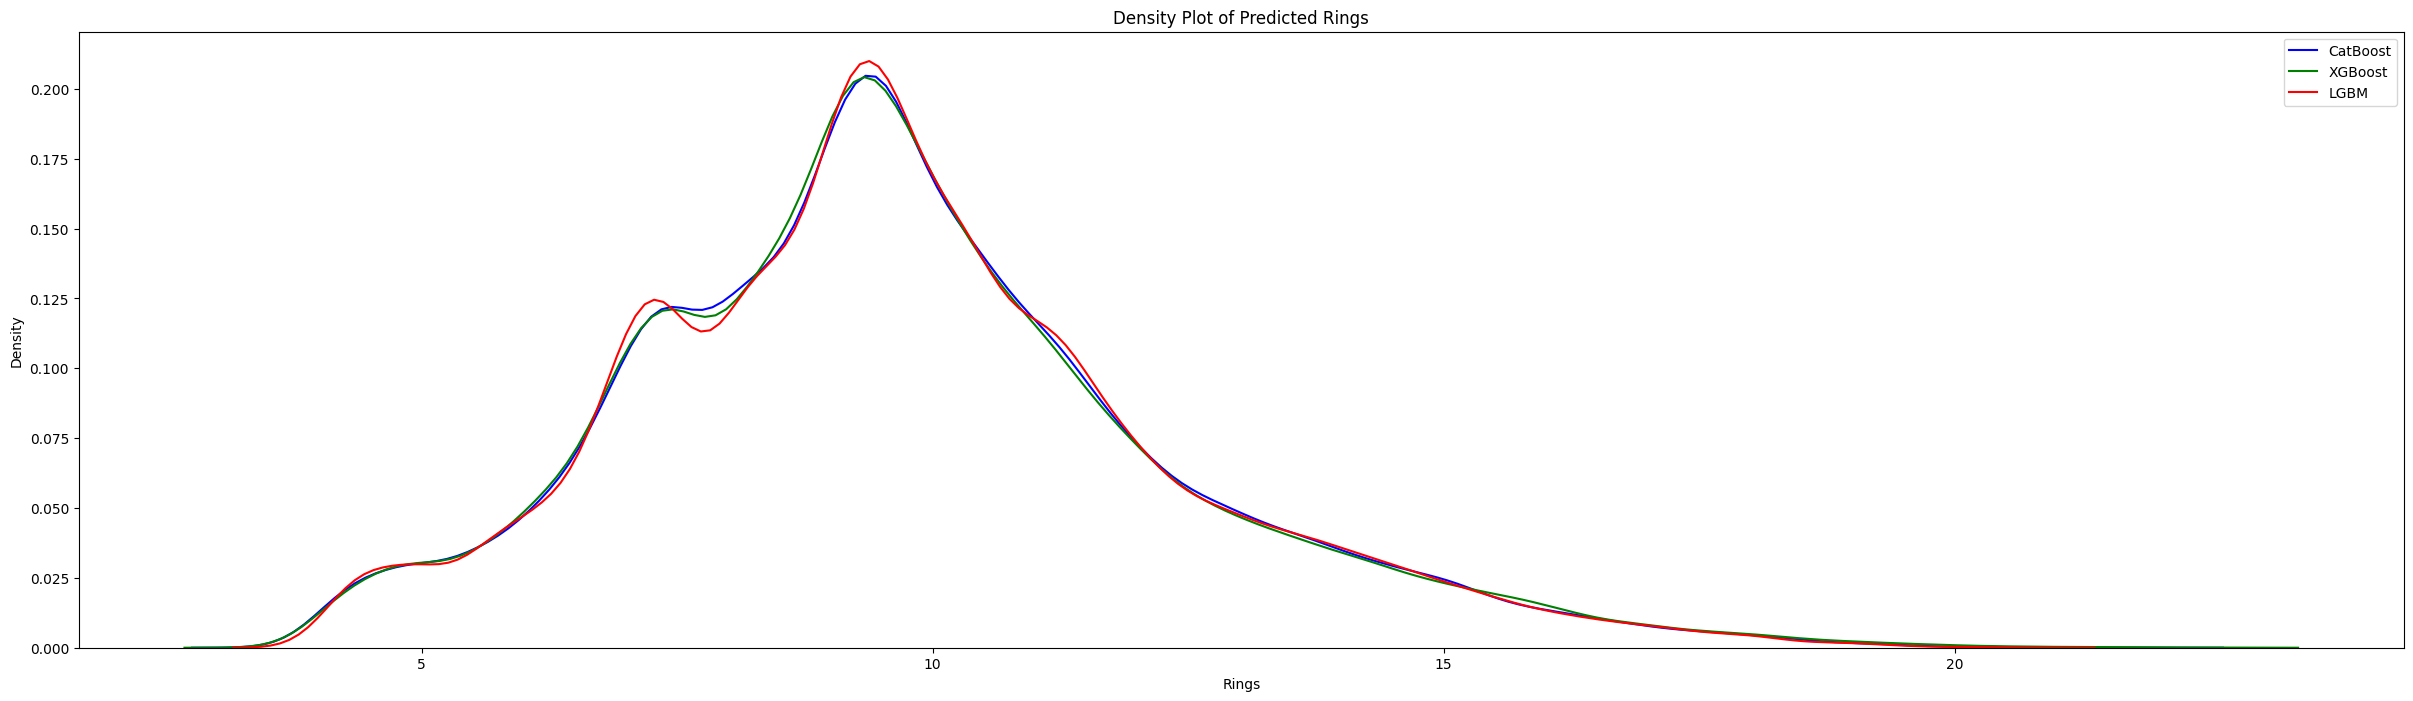

In [35]:
# Plot density plot
plt.figure(figsize=(30, 8))
sns.kdeplot(predictions_cb, color='blue', label='CatBoost')
sns.kdeplot(predictions_xgb, color='green', label='XGBoost')
sns.kdeplot(predictions_lgbm, color='red', label='LGBM')
plt.title('Density Plot of Predicted Rings')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()
plt.show()


In [36]:
sample_submission.head()

,id,Rings
0,90615,10.147534
1,90616,9.773427
2,90617,10.339787
3,90618,8.840487
4,90619,7.717552


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>X |</span></b> <b>FUTURE WORK</b></div>

- Feature analysis
- Hyperparameter Tuning
- Ensemble Learning